In [1]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("roll_data/*-triples.csv")

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

len(df)

8462

In [2]:
df.loc[df["pitcher_mods"].astype(str).str.contains("SCATTERED"),"pitcher_vibes"] = 0
df.loc[df["batter_mods"].astype(str).str.contains("SCATTERED"),"batter_vibes"] = 0

for attr in ['batter_buoyancy', 'batter_divinity', 'batter_martyrdom', 'batter_moxie', 'batter_musclitude', 'batter_patheticism', 'batter_thwackability', 'batter_tragicness', 'batter_coldness', 'batter_overpowerment', 'batter_ruthlessness', 'batter_shakespearianism', 'batter_suppression', 'batter_unthwackability', 'batter_base_thirst', 'batter_continuation', 'batter_ground_friction', 'batter_indulgence', 'batter_laserlikeness', 'batter_anticapitalism', 'batter_chasiness', 'batter_omniscience', 'batter_tenaciousness', 'batter_watchfulness', 'batter_pressurization', 'batter_cinnamon']:
    df[attr] = df[attr] * df['batter_multiplier']
    df[attr+'_with_vibe'] = df[attr] * (1 + 0.2 * df['batter_vibes'])
for attr in ['pitcher_buoyancy', 'pitcher_divinity', 'pitcher_martyrdom', 'pitcher_moxie', 'pitcher_musclitude', 'pitcher_patheticism', 'pitcher_thwackability', 'pitcher_tragicness', 'pitcher_ruthlessness', 'pitcher_overpowerment', 'pitcher_unthwackability', 'pitcher_shakespearianism', 'pitcher_suppression', 'pitcher_coldness', 'pitcher_base_thirst', 'pitcher_continuation', 'pitcher_ground_friction', 'pitcher_indulgence', 'pitcher_laserlikeness', 'pitcher_anticapitalism', 'pitcher_chasiness', 'pitcher_omniscience', 'pitcher_tenaciousness', 'pitcher_watchfulness', 'pitcher_pressurization', 'pitcher_cinnamon']:
    df[attr] = df[attr] * df['pitcher_multiplier']
    df[attr+'_with_vibe'] = df[attr] * (1 + 0.2 * df['pitcher_vibes'])


/tmp/ipykernel_325078/1380338088.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr+'_with_vibe'] = df[attr] * (1 + 0.2 * df['pitcher_vibes'])
/tmp/ipykernel_325078/1380338088.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr+'_with_vibe'] = df[attr] * (1 + 0.2 * df['pitcher_vibes'])
/tmp/ipykernel_325078/1380338088.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

In [3]:
dfc = df
# for exclude_mod in ["OVERPERFORMING", "UNDERPERFORMING", "HIGH_PRESSURE", "GROWTH", "SINKING_SHIP", "TRAVELING"]:
for exclude_mod in ["FLINCH", "O_NO", "ON_FIRE", "GROWTH", "TRAVELING"]:
 dfc = dfc[~dfc["batter_mods"].astype(str).str.contains(exclude_mod)]
 dfc = dfc[~dfc["pitcher_mods"].astype(str).str.contains(exclude_mod)]
 dfc = dfc[~dfc["pitching_team_mods"].astype(str).str.contains(exclude_mod)]
 dfc = dfc[~dfc["batting_team_mods"].astype(str).str.contains(exclude_mod)]

# dfc = dfc[dfc['roll'] < 0.7]
# dfc = dfc[dfc['roll'] > 0.2]
dfc = dfc[(dfc['pitcher_multiplier'] == 1) & (dfc['batter_multiplier'] == 1)]
# dfc = dfc[(dfc['pitcher_vibes'].abs() < 0.2) & (dfc['batter_vibes'].abs() < 0.2)]
# for limit_attr in ['batter_patheticism', 'batter_thwackability', 'batter_divinity', 'batter_musclitude', 'pitcher_ruthlessness']:
#     dfc = dfc[(dfc[limit_attr] > 0.1) & (dfc[limit_attr] < 0.9)]
# dfc = dfc[dfc['batter_thwackability'] + dfc['batter_musclitude'] + dfc['batter_divinity'] > dfc['batter_patheticism']]

len(dfc)

5099

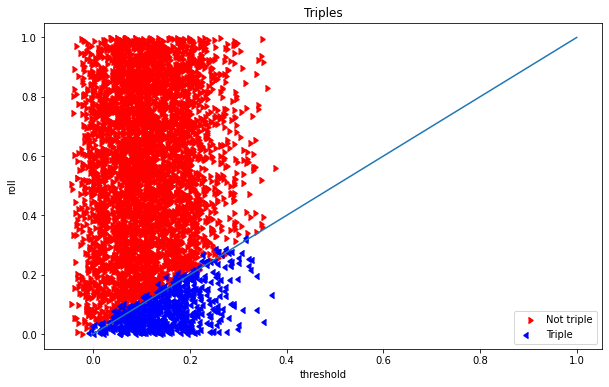

In [33]:
dfc['threshold'] = 0.05-(
    - 0.2 * dfc['batter_ground_friction_with_vibe']
    - 0.05 * dfc['ballpark_grandiosity']
    + 0.05 * dfc['defense_avg_chasiness']
    + 0.05 * dfc['pitcher_overpowerment_with_vibe']
    + 0.05 * dfc['defense_avg_omniscience']
)


x_val = "threshold"
# x_val = "svc_best"
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.scatter(dfc[~dfc['passed']][x_val], dfc[~dfc['passed']]["roll"], color="red",
           label="Not triple", marker=CARETRIGHTBASE)
ax.scatter(dfc[dfc['passed']][x_val], dfc[dfc['passed']]["roll"], color="blue",
           label="Triple", marker=CARETLEFTBASE)
ax.set_xlabel(x_val)
ax.set_ylabel('roll')
ax.set_title("Triples")
# ax.set_xlim(0.484, 0.499)

ax.plot((0, 1), (0, 1))

ax.legend()

,offset,event_type,home_score,away_score,top_of_inning,inning,pitcher_multiplier,batter_multiplier,baserunner_count,event_type,...,batter_musclitude,batter_name,pitcher_name,batter_mods,pitcher_mods,batting_team_mods,pitching_team_mods,day,game_id,play_count
7703,0.036048,Hit3,2.0,2.0,False,5,1.0,1.0,[],Hit3,...,0.562577,Baby Triumphant,Val Hitherto,REVERBERATING,NaN,NaN,NaN,19,423a48b0-3876-4bf0-a4d3-d9f639c568cb,199
8161,0.034797,Hit3,0.0,0.0,True,0,1.0,1.0,[],Hit3,...,1.088566,Summers Preston,Alejandro Leaf,NaN,HONEY_ROASTED;WANDERER,NaN,NaN,23,ed65e3cb-c300-4545-b7ef-87378a78e6ed,4
6072,0.033839,Hit3,1.0,3.0,False,4,1.0,1.0,[],Hit3,...,0.945664,Dudley Mueller,Rivers Rosa,SIPHON,NaN,BASE_INSTINCTS,NaN,8,7f98920b-70c5-4f0d-b353-beb5fadd04ad,152
5872,0.031473,Hit3,2.0,0.0,False,1,1.0,1.0,['f0bcf4bb-74b3-412e-a54c-04c12ad28ecb'],Hit3,...,0.945664,Dudley Mueller,Caleb Alvarado,SIPHON,FRIEND_OF_CROWS,BASE_INSTINCTS,NaN,7,d9ec7300-07eb-4a56-8565-b1b147864cb1,78
17,0.030744,Hit3,2.0,0.0,False,1,1.0,1.0,[],Hit3,...,0.877497,Huber Frumple,Winnie Hess,NaN,SIPHON,AFFINITY_FOR_CROWS,NaN,29,c0de1f40-3f17-4b4a-b669-4d6687e15bea,53
5523,0.030508,Hit3,2.0,9.0,True,4,1.0,1.0,['750a7ba9-e595-40be-93e5-4021f1f9460d'],Hit3,...,0.561752,Ve--ali-s Sund-e,Sexton Wheerer,SCATTERED,ALTERNATE;SUPERALLERGIC;FRIEND_OF_CROWS;EGO1,BOTTOM_DWELLER;PARTY_TIME,SUN_KISSED,96,f42fc7fd-ebf5-450c-94a9-47e0057c1059,171
8339,0.028593,Hit3,1.0,2.0,True,1,1.0,1.0,['7932c7c7-babb-4245-b9f5-cdadb97c99fb'],Hit3,...,0.729312,Aldon Cashmoney,Gerund Pantheocide,SPICY;EGO1,NaN,FIREPROOF;SEALANT;AMBUSH,NaN,24,05b4e6b4-12c0-4126-b633-cbb531927506,56
5065,0.026422,Hit3,0.0,0.0,False,1,1.0,1.0,[],Hit3,...,0.398141,Yong Wright,Grollis Zephyr,NaN,NaN,NaN,NaN,93,56ee94cd-df71-4cac-b687-316b3460f093,58
5494,0.024376,Hit3,2.0,1.0,True,3,1.0,1.0,[],Hit3,...,1.022726,Usurper Violet,Wesley Poole,NaN,NaN,FIREPROOF;SEALANT;AMBUSH,PARTY_TIME,96,3244b12f-838a-4d75-abde-88874b75ab04,114
2346,0.023513,Hit3,0.0,0.0,True,3,1.0,1.0,[],Hit3,...,0.871010,Sandie Turner,Leach Herman,SPICY;PERK,ALTERNATE;FRIEND_OF_CROWS,BIRD_SEED,NaN,45,451ce85d-3297-4af1-b9ba-0105da061e65,88


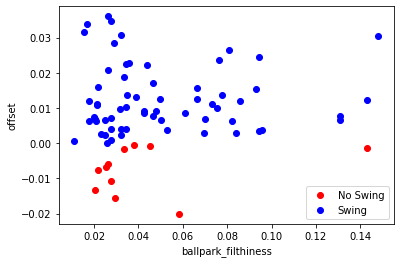

In [35]:
dfc["offset"] = dfc["roll"] - dfc["threshold"]
outliers = dfc[(dfc["passed"] & (dfc["offset"] >= 0)) | (~dfc["passed"] & (dfc["offset"] <= 0))]

fig, ax = plt.subplots(1)
x_val = "ballpark_filthiness"
ax.scatter(outliers[~outliers['passed']][x_val], outliers[~outliers['passed']]["offset"], color="red", label="No Swing")
ax.scatter(outliers[outliers['passed']][x_val], outliers[outliers['passed']]["offset"], color="blue", label="Swing")
ax.set_xlabel(x_val)
ax.set_ylabel('offset')
ax.legend()

table = outliers
table[["offset", "event_type", "home_score", "away_score", "top_of_inning", "inning",
       "pitcher_multiplier", "batter_multiplier", "baserunner_count", "event_type",
       "roll", "threshold", "batter_vibes", "pitcher_vibes",
       "pitcher_ruthlessness", "batter_musclitude",
       "batter_name", "pitcher_name", "batter_mods", "pitcher_mods",
       "batting_team_mods", "pitching_team_mods", "day",  "game_id", "play_count"]].sort_values('offset', ascending=False).iloc[:20]
# len(table)

In [28]:
outliers.corr()['offset'].sort_values()

play_count            -0.169519
ballpark_mysticism    -0.156326
inning                -0.141370
ballpark_elongation   -0.124486
home_score            -0.122206
                         ...   
batter_multiplier           NaN
pitcher_multiplier          NaN
batting_team_hype           NaN
pitching_team_hype          NaN
season                      NaN
Name: offset, Length: 146, dtype: float64

In [29]:
X = dfc[['roll', 'passed',
         'batter_ground_friction_with_vibe',
         'pitcher_overpowerment_with_vibe',
         'defense_avg_chasiness',
         'defense_avg_omniscience',
         'ballpark_grandiosity',
         'ballpark_viscosity',
         'ballpark_forwardness',
         'ballpark_ominousness',
        ]]
# X = X[X['roll'] < 0.85]

# X = dfc[['roll', 'pitcher_ruthlessness', 'ballpark_forwardness']]
# X = dfc[['roll', 'pitcher_ruthlessness']]
y = X['passed']
X = X.drop('passed', axis=1)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, linear_model

# # trainedsvm = svm.SVC(kernel='linear').fit(X, y)
# trainedsvm = svm.LinearSVC(dual=False, max_iter=100000).fit(X, y)
# predictionsvm = trainedsvm.predict(X)
# print(confusion_matrix(y,predictionsvm))
# print(classification_report(y,predictionsvm))

sc = StandardScaler()
X2 = sc.fit_transform(X)

trainedsvm = svm.LinearSVC(intercept_scaling=100, dual=False, max_iter=100000, C=1000, class_weight='balanced').fit(X2, y)
predictionsvm = trainedsvm.predict(X2)
print(confusion_matrix(y,predictionsvm))
print(classification_report(y,predictionsvm))

[[4370   81]
 [   6  642]]
              precision    recall  f1-score   support

       False       1.00      0.98      0.99      4451
        True       0.89      0.99      0.94       648

    accuracy                           0.98      5099
   macro avg       0.94      0.99      0.96      5099
weighted avg       0.98      0.98      0.98      5099



In [31]:
coef = np.true_divide(trainedsvm.coef_, sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[(1.0, 'roll'),
 (-0.19833013475441033, 'batter_ground_friction_with_vibe'),
 (-0.0548756262443733, 'ballpark_grandiosity'),
 (0.04032903210220239, 'pitcher_overpowerment_with_vibe'),
 (0.035983297747621844, 'defense_avg_chasiness'),
 (0.020508575457511984, 'ballpark_viscosity'),
 (0.018857245544719365, 'defense_avg_omniscience'),
 (-0.01291103372089429, 'ballpark_ominousness'),
 (0.01252859376184224, 'ballpark_forwardness')]

In [32]:
intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept_scaled = intercept / coef[0, 0]
intercept_scaled

array([-0.05124629])

In [11]:
df.sort_values('pitcher_ruthlessness')[['pitcher_name', 'pitcher_ruthlessness', 'pitcher_multiplier']]

,pitcher_name,pitcher_ruthlessness,pitcher_multiplier
2866,Flattery McKinley,0.060292,1.00
6005,Flattery McKinley,0.060292,1.00
6002,Flattery McKinley,0.060292,1.00
1325,Flattery McKinley,0.060292,1.00
1319,Flattery McKinley,0.060292,1.00
...,...,...,...
4450,PolkaDot Patterson,1.695776,1.25
6952,PolkaDot Patterson,1.695776,1.25
6202,PolkaDot Patterson,1.695776,1.25
6959,PolkaDot Patterson,1.695776,1.25


In [12]:
dfc[dfc['pitcher_ruthlessness'] > 1.6]

,Unnamed: 0,event_type,roll,passed,batter_buoyancy,batter_divinity,batter_martyrdom,batter_moxie,batter_musclitude,batter_patheticism,...,pitcher_laserlikeness_with_vibe,pitcher_anticapitalism_with_vibe,pitcher_chasiness_with_vibe,pitcher_omniscience_with_vibe,pitcher_tenaciousness_with_vibe,pitcher_watchfulness_with_vibe,pitcher_pressurization_with_vibe,pitcher_cinnamon_with_vibe,threshold,offset


In [13]:
outliers = dfc[~dfc['passed'] & (dfc['roll'] < 0.1)]
outliers

,Unnamed: 0,event_type,roll,passed,batter_buoyancy,batter_divinity,batter_martyrdom,batter_moxie,batter_musclitude,batter_patheticism,...,pitcher_laserlikeness_with_vibe,pitcher_anticapitalism_with_vibe,pitcher_chasiness_with_vibe,pitcher_omniscience_with_vibe,pitcher_tenaciousness_with_vibe,pitcher_watchfulness_with_vibe,pitcher_pressurization_with_vibe,pitcher_cinnamon_with_vibe,threshold,offset
40,40,Hit2,0.095358,False,0.686977,1.005673,0.600923,0.864041,0.801767,0.354439,...,0.941324,0.435797,1.021833,1.034819,0.955218,0.554922,0.248074,0.133032,-0.018412,0.113771
66,66,Hit1,0.033062,False,0.686405,0.276921,0.943324,0.645117,0.187481,0.050000,...,0.139853,0.153491,0.964286,0.100794,0.612184,0.614014,0.349721,0.367183,-0.037292,0.070354
298,298,Hit2,0.031883,False,0.686405,0.276921,0.943324,0.645117,0.187481,0.050000,...,0.321763,0.905327,0.533212,0.691982,0.743407,0.224369,0.190863,0.138787,-0.030660,0.062543
314,314,Hit1,0.042503,False,0.311859,0.292330,0.012455,0.046150,0.172809,0.815460,...,1.006981,1.102768,0.287702,0.344777,0.649297,0.859082,0.377210,0.393588,-0.006347,0.048849
316,316,Hit1,0.092204,False,0.485050,0.635958,0.899090,0.732174,0.783859,0.207444,...,0.466670,0.511442,0.719116,0.769299,1.186653,0.518727,1.037834,0.395803,0.056726,0.035477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8228,2506,Hit1,0.072327,False,0.730418,0.963922,0.937631,0.713885,0.964179,0.043703,...,0.378249,0.923350,1.003015,0.581502,1.201842,0.792125,0.162430,0.438379,0.019771,0.052556
8229,2507,Hit1,0.076076,False,0.277885,0.982483,0.827057,0.608965,0.483644,0.010000,...,0.624651,0.848874,1.201334,1.092400,1.111284,1.182439,0.314801,0.501341,-0.000295,0.076371
8368,2646,Hit1,0.074082,False,0.894610,0.900169,0.953274,0.510460,0.949114,0.820071,...,0.965118,0.760016,0.772749,0.372278,0.485181,0.464115,0.410589,0.088361,-0.009418,0.083500
8436,2714,Hit1,0.074674,False,0.380275,0.992331,0.253887,0.443591,0.881658,0.387686,...,0.700789,0.779300,0.346504,0.701333,0.567738,0.648077,0.148826,0.484023,0.047774,0.026900


In [14]:
df[df['batter_thwackability'] + df['batter_musclitude'] + df['batter_divinity'] < df['batter_patheticism']]

,Unnamed: 0,event_type,roll,passed,batter_buoyancy,batter_divinity,batter_martyrdom,batter_moxie,batter_musclitude,batter_patheticism,...,pitcher_ground_friction_with_vibe,pitcher_indulgence_with_vibe,pitcher_laserlikeness_with_vibe,pitcher_anticapitalism_with_vibe,pitcher_chasiness_with_vibe,pitcher_omniscience_with_vibe,pitcher_tenaciousness_with_vibe,pitcher_watchfulness_with_vibe,pitcher_pressurization_with_vibe,pitcher_cinnamon_with_vibe
1357,1357,Hit3,0.192149,True,0.407004,0.136416,0.070000,0.637947,0.196717,0.930000,...,0.874017,0.009876,0.808042,0.280444,0.780155,0.421234,0.350101,0.164157,0.388034,0.168658
1647,1647,Hit1,0.244096,False,0.060616,0.222707,0.807659,0.630114,0.401432,0.868690,...,0.643483,0.591743,0.171001,0.267023,0.943229,1.137316,0.672789,0.224545,1.214095,0.909322
1728,1728,Hit1,0.225545,False,0.517663,0.169405,0.227826,0.721262,0.442868,0.926662,...,0.575497,0.400284,0.071350,0.481038,0.343641,0.540082,0.493422,0.445972,0.426369,0.570181
1870,1870,Hit1,0.083462,False,0.517663,0.169405,0.227826,0.721262,0.442868,0.926662,...,0.462480,1.006087,0.933390,0.488240,1.146511,0.408083,1.046801,1.088286,0.083387,0.416939
2186,2186,Hit2,0.120527,False,0.517663,0.169405,0.227826,0.721262,0.442868,0.926662,...,0.414672,0.316622,0.141890,0.342179,0.904175,0.641368,1.133491,0.660837,0.605870,0.882363
2239,2239,Hit1,0.047004,False,0.517663,0.169405,0.227826,0.721262,0.442868,0.926662,...,0.414672,0.316622,0.141890,0.342179,0.904175,0.641368,1.133491,0.660837,0.605870,0.882363
2833,2833,Hit1,0.387824,False,0.517663,0.169405,0.227826,0.721262,0.442868,0.926662,...,1.298616,0.326328,0.979279,0.356777,1.350980,1.029830,0.374781,1.186430,0.176387,1.355540
2991,2991,Hit1,0.718372,False,0.517663,0.169405,0.227826,0.721262,0.442868,0.926662,...,0.956509,0.907576,0.465115,0.233930,0.436909,1.052370,0.501397,1.303192,0.292978,0.938841
3016,3016,Hit2,0.309633,False,0.517663,0.169405,0.227826,0.721262,0.442868,0.926662,...,0.956509,0.907576,0.465115,0.233930,0.436909,1.052370,0.501397,1.303192,0.292978,0.938841
3046,3046,Hit1,0.380432,False,0.517663,0.169405,0.227826,0.721262,0.442868,0.926662,...,0.849155,0.908789,1.096120,0.608710,0.819566,0.415448,0.528225,0.385258,0.392668,0.821380


In [15]:
list(df.columns)

['Unnamed: 0',
 'event_type',
 'roll',
 'passed',
 'batter_buoyancy',
 'batter_divinity',
 'batter_martyrdom',
 'batter_moxie',
 'batter_musclitude',
 'batter_patheticism',
 'batter_thwackability',
 'batter_tragicness',
 'batter_coldness',
 'batter_overpowerment',
 'batter_ruthlessness',
 'batter_shakespearianism',
 'batter_suppression',
 'batter_unthwackability',
 'batter_base_thirst',
 'batter_continuation',
 'batter_ground_friction',
 'batter_indulgence',
 'batter_laserlikeness',
 'batter_anticapitalism',
 'batter_chasiness',
 'batter_omniscience',
 'batter_tenaciousness',
 'batter_watchfulness',
 'batter_pressurization',
 'batter_cinnamon',
 'batter_multiplier',
 'pitcher_buoyancy',
 'pitcher_divinity',
 'pitcher_martyrdom',
 'pitcher_moxie',
 'pitcher_musclitude',
 'pitcher_patheticism',
 'pitcher_thwackability',
 'pitcher_tragicness',
 'pitcher_ruthlessness',
 'pitcher_overpowerment',
 'pitcher_unthwackability',
 'pitcher_shakespearianism',
 'pitcher_suppression',
 'pitcher_coldn